# Customer Segmentation

# Objective

> Tujuan utama dari proyek ini adalah melakukan segmentasi pelanggan berdasarkan perilaku penggunaan kartu kredit menggunakan teknik clustering.

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from feature_engine.outliers import Winsorizer
from sklearn.metrics import silhouette_score,silhouette_samples

# Data Loading

## Data Dictionary

Dataset ini berisi data informasi penggunaan kartu kredit selama 6 bulan terakhir.

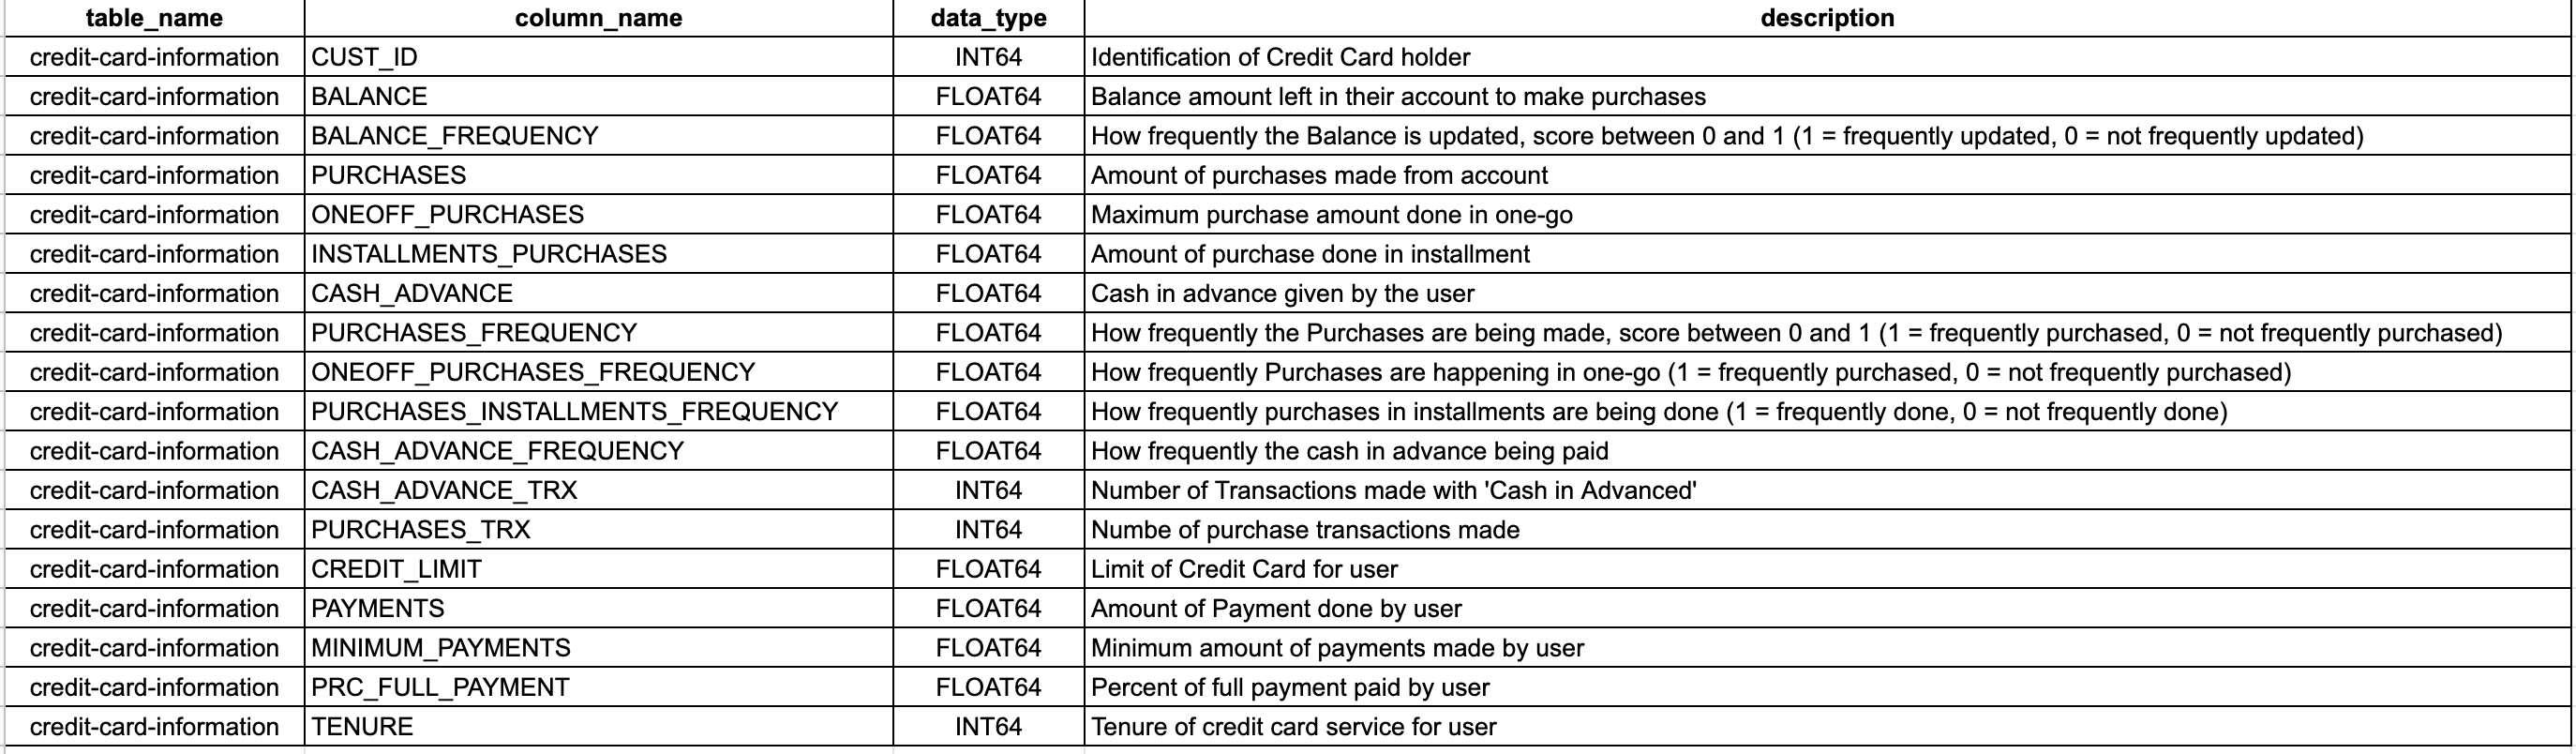

In [ ]:
df = pd.read_csv('credit_card.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [5]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


## Check Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

*   dataset yang `cust_id` nya genap memiliki 4475 entries dengan 18 kolom
*   Pada kolom `minimum_payments` dan `credit_limit` terdapat missing values



# Exploratory Data Analysis (EDA)

In [7]:
num_col = [ 'BALANCE', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
            'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                'PURCHASES_INSTALLMENTS_FREQUENCY']

cat_col = ['TENURE']

## Check Missing Value

In [8]:
# Cek Missing Value
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 2 kolom yang memiliki missing values:
- `credit_limit` = 1

  Dengan hanya satu missing value, ini kemungkinan besar MCAR (Missing Completely at Random). Hilangnya nilai mungkin disebabkan oleh kesalahan input data
- `minimum_payments` = 158

  missing value pada `MINIMUM_PAYMENTS` kemungkinan besar MCAR (Missing Completely at Random) karena bisa jadi kesalahan sistem yang tidak update atau saat input data.

## Check Distribution and Skewness

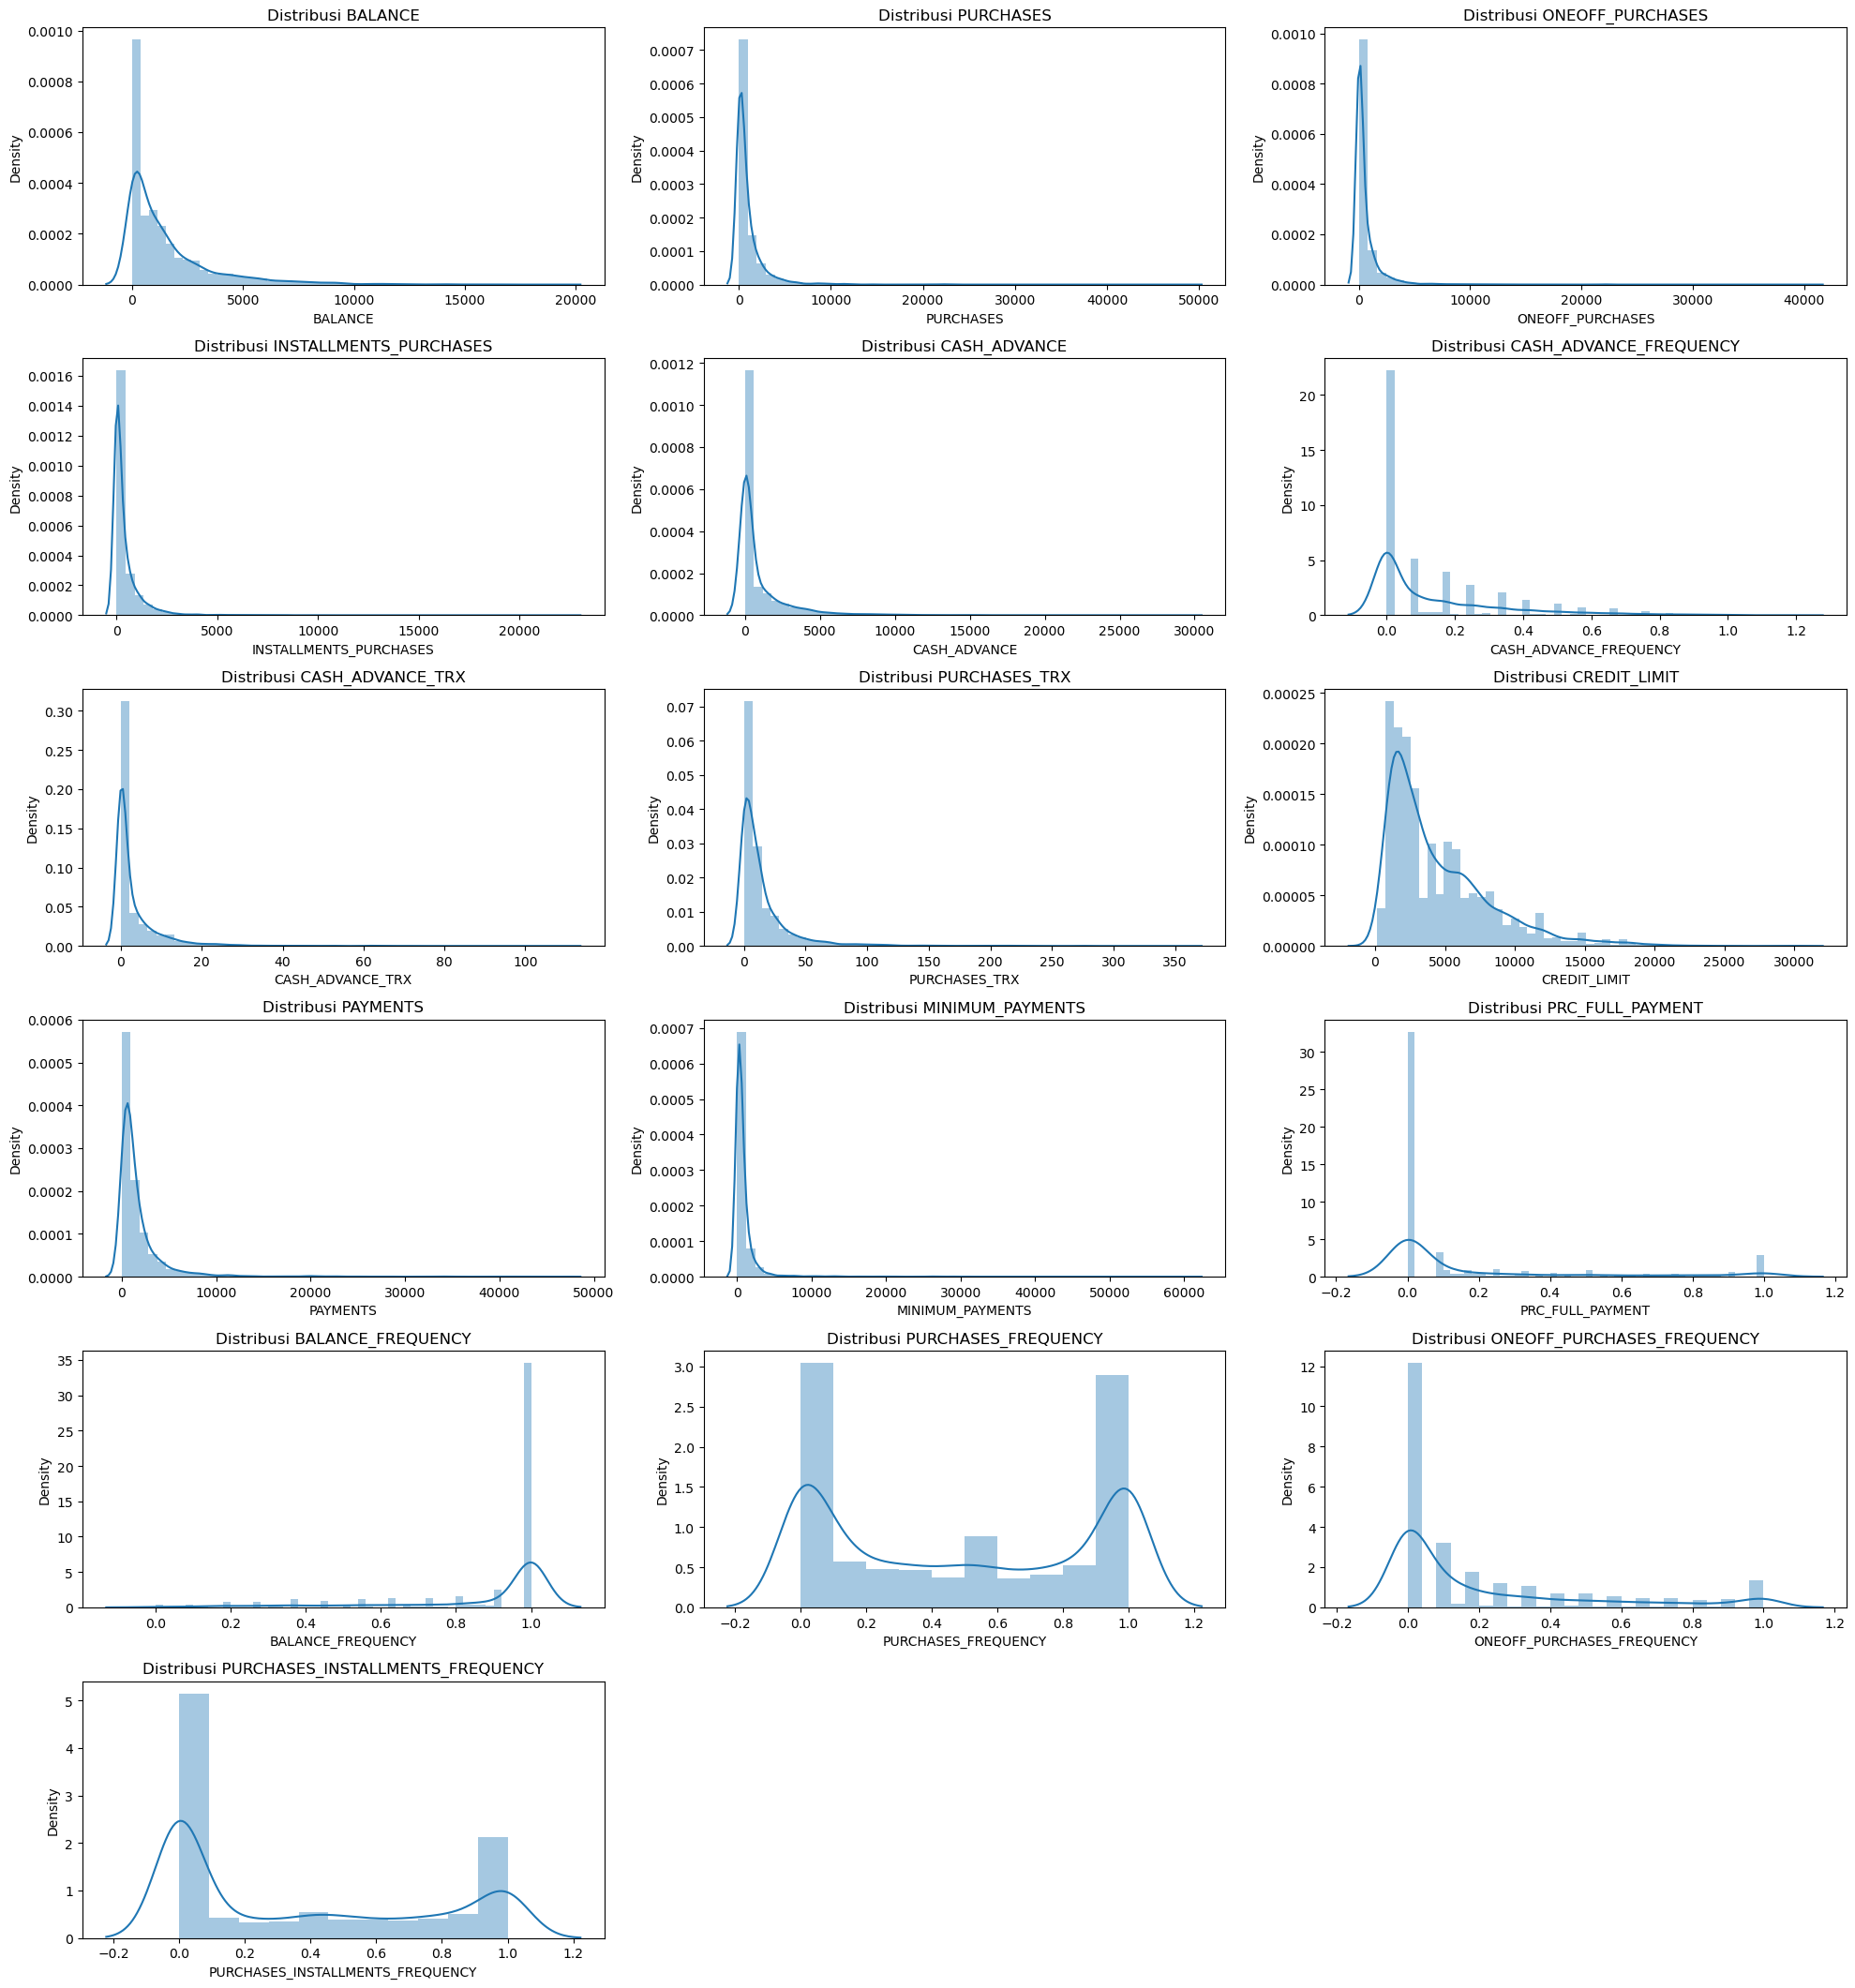

In [9]:
plt.figure(figsize=(20,35))
for i, col in enumerate(num_col):
    ax = plt.subplot(10, 3, i+1)
    sns.distplot(df[col],kde=True)
    plt.title(f'Distribusi {col}'),
    plt.xlabel(col)
plt.tight_layout()

plt.show()

dari persebaran distribusinya, hampir semua kolom menunjukkan skewed yang artinya distribusinya tidak normal. Hanya `PURCHASES_FREQUENCY` yang memiliki distribusi normal.

In [10]:
# Cek Skewness
for col in num_col:
  skewness = df[col].skew()
  print(f'Skewness of {col}: {skewness:.3f}')

Skewness of BALANCE: 2.457
Skewness of PURCHASES: 8.987
Skewness of ONEOFF_PURCHASES: 10.140
Skewness of INSTALLMENTS_PURCHASES: 8.117
Skewness of CASH_ADVANCE: 4.740
Skewness of CASH_ADVANCE_FREQUENCY: 1.823
Skewness of CASH_ADVANCE_TRX: 4.753
Skewness of PURCHASES_TRX: 4.480
Skewness of CREDIT_LIMIT: 1.545
Skewness of PAYMENTS: 6.041
Skewness of MINIMUM_PAYMENTS: 12.358
Skewness of PRC_FULL_PAYMENT: 1.912
Skewness of BALANCE_FREQUENCY: -2.020
Skewness of PURCHASES_FREQUENCY: 0.062
Skewness of ONEOFF_PURCHASES_FREQUENCY: 1.523
Skewness of PURCHASES_INSTALLMENTS_FREQUENCY: 0.510


## 1. Apakah terdapat pola antara pengaruh `TENURE` dengan variabel `PURCHASES`, `BALANCE`, dan `PAYMENTS`

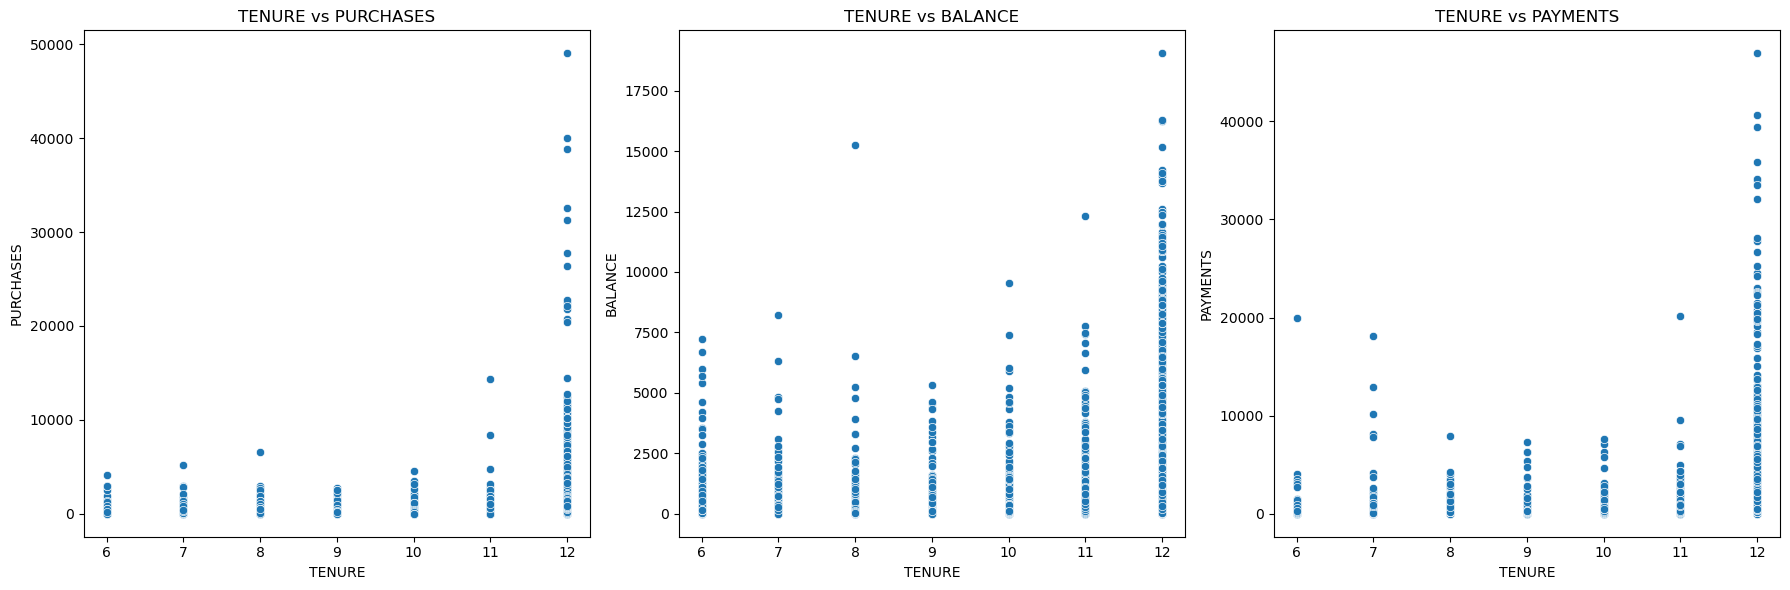

In [11]:
# Scatter Plot antara TENURE dan variabel lainnya
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# TENURE vs PURCHASES
sns.scatterplot(ax=axes[0], x='TENURE', y='PURCHASES', data=df)
axes[0].set_title('TENURE vs PURCHASES')

# TENURE vs BALANCE
sns.scatterplot(ax=axes[1], x='TENURE', y='BALANCE', data=df)
axes[1].set_title('TENURE vs BALANCE')

# TENURE vs PAYMENTS
sns.scatterplot(ax=axes[2], x='TENURE', y='PAYMENTS', data=df)
axes[2].set_title('TENURE vs PAYMENTS')

plt.tight_layout()
plt.show()

Berdasarkan scatter plot, insightnya:
- **Tenure vs Purchases**

>Tidak ada pola yang jelas, titik-titik data tersebar cukup acak, tidak menunjukkan tren peningkatan atau penurunan yang signifikan seiring bertambahnya tenure.

- **Tenure vs Balance**

>Terdapat beberapa titik data dengan saldo yang sangat tinggi pada berbagai rentang tenure. Ini menunjukkan bahwa saldo pelanggan tidak selalu meningkat atau menurun secara konsisten seiring waktu.

- **Tenure vs Payments**

>titik-titik data tersebar cukup acak. Ini menunjukkan bahwa jumlah pembayaran juga tidak memiliki hubungan linier yang kuat dengan tenure.

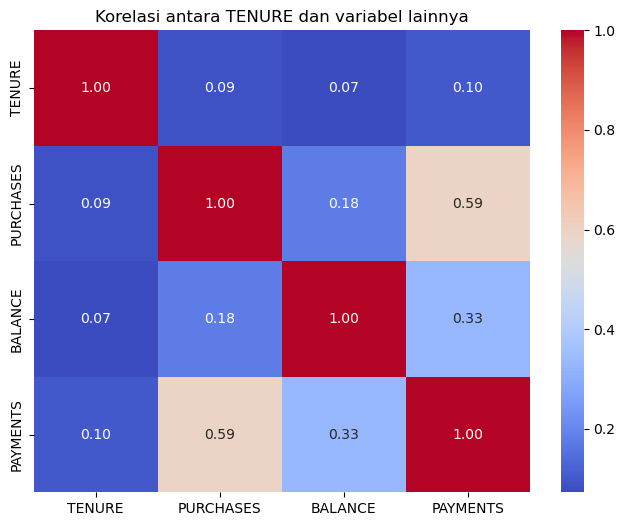

In [12]:
# Menghitung korelasi antara TENURE dan variabel lainnya menggunakan heatmap
corr_matrix = df[['TENURE', 'PURCHASES', 'BALANCE', 'PAYMENTS']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara TENURE dan variabel lainnya')
plt.show()


Jika dilihat dari korelasinya, `tenure` terhadap variabel `purchases`, `balance` dan `payments` menunjukkan hubungan yang lemah. Artinya, variabel - variabel tersebut tidak terlalu berpengaruh terhadap `tenure`.

**Rekomendasi Bisnis untuk tim marketing:**

- Fokus pada Program Loyalitas:

>Tim marketing mungkin perlu mengembangkan program loyalitas yang mendorong pelanggan lama untuk lebih aktif dalam pembelian. Penawaran khusus seperti diskon eksklusif untuk pelanggan dengan TENURE tinggi bisa menjadi solusi untuk meningkatkan pembelian.

- Strategi Retensi untuk Nasabah Lama:

>Implementasikan strategi untuk menjaga pelanggan yang sudah ada tetap puas dan terlibat, seperti kampanye pemasaran yang ditargetkan dan layanan pelanggan yang sangat baik.


## 2. Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian?

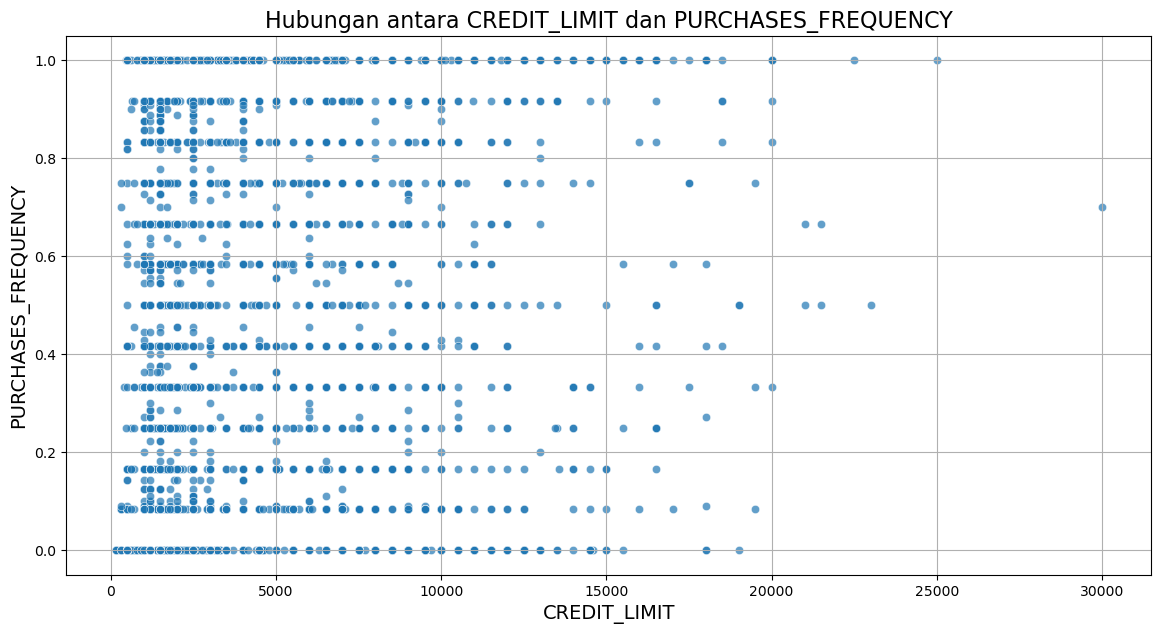

In [13]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', alpha=0.7)
plt.title('Hubungan antara CREDIT_LIMIT dan PURCHASES_FREQUENCY', fontsize=16)
plt.xlabel('CREDIT_LIMIT', fontsize=14)
plt.ylabel('PURCHASES_FREQUENCY', fontsize=14)
plt.grid()
plt.show()


Insight:
- Data tersebar cukup merata di seluruh rentang CREDIT_LIMIT. Ini menunjukkan bahwa ada nasabah dengan batas kredit tinggi maupun rendah yang memiliki frekuensi pembelian yang tinggi maupun rendah.
- Terdapat beberapa titik data yang berada jauh dari kelompok data lainnya (outlier). Titik-titik ini mewakili nasabah dengan batas kredit tinggi tetapi frekuensi pembelian rendah, atau sebaliknya.
- Dapat disimpulkan bahwa tidak ada hubungan yang jelas antara (CREDIT_LIMIT) dan (PURCHASES_FREQUENCY). Artinya, memiliki Credit limit yang tinggi tidak secara otomatis berarti seseorang akan lebih sering berbelanja.

# Feature Engineering

## Handling Missing Values

In [14]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
# Handling CREDIT_LIMIT
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [16]:
# Handling MINIMUM_PAYMENTS
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [17]:
# Cek Kembali
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Check and Handling Outliers

In [18]:
# Cek Skewness
for col in num_col:
  skewness = df[col].skew()
  print(f'Skewness of {col}: {skewness:.3f}')

Skewness of BALANCE: 2.457
Skewness of PURCHASES: 8.987
Skewness of ONEOFF_PURCHASES: 10.140
Skewness of INSTALLMENTS_PURCHASES: 8.117
Skewness of CASH_ADVANCE: 4.740
Skewness of CASH_ADVANCE_FREQUENCY: 1.823
Skewness of CASH_ADVANCE_TRX: 4.753
Skewness of PURCHASES_TRX: 4.480
Skewness of CREDIT_LIMIT: 1.545
Skewness of PAYMENTS: 6.041
Skewness of MINIMUM_PAYMENTS: 12.570
Skewness of PRC_FULL_PAYMENT: 1.912
Skewness of BALANCE_FREQUENCY: -2.020
Skewness of PURCHASES_FREQUENCY: 0.062
Skewness of ONEOFF_PURCHASES_FREQUENCY: 1.523
Skewness of PURCHASES_INSTALLMENTS_FREQUENCY: 0.510


In [19]:
# Split Skew yang normal dan high
skewness = df[num_col].skew()
highly_skewed_col = list(skewness[abs(skewness) > 1].index)
normal_skewed_col = list(skewness[abs(skewness) <= 1].index)

highly_skewed_col, normal_skewed_col

(['BALANCE',
  'PURCHASES',
  'ONEOFF_PURCHASES',
  'INSTALLMENTS_PURCHASES',
  'CASH_ADVANCE',
  'CASH_ADVANCE_FREQUENCY',
  'CASH_ADVANCE_TRX',
  'PURCHASES_TRX',
  'CREDIT_LIMIT',
  'PAYMENTS',
  'MINIMUM_PAYMENTS',
  'PRC_FULL_PAYMENT',
  'BALANCE_FREQUENCY',
  'ONEOFF_PURCHASES_FREQUENCY'],
 ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'])

Untuk mengatasi outliers saya menggunakan winsorizer karena berdasarkan dataset, variabel seperti BALANCE dan PURCHASES sering kali dapat mengalami fluktuasi besar misalnya, beberapa nasabah mungkin melakukan pembelian besar-besaran pada waktu tertentu, yang dapat menciptakan outliers. Maka dari itu, Winsorizer membantu menangani variabilitas ini dengan menjaga nilai-nilai dalam rentang yang lebih wajar

In [20]:
# Handling Outliers Distribusi tidak Normal
winsoriser_high_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=highly_skewed_col)

df = winsoriser_high_skewed.fit_transform(df)
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.555556,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,309.854995,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.555556,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,309.854995,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,16,25,6000.0,905.844846,2376.919568,0.090909,11


In [21]:
# Cek Skewness kembali
df.skew()

CUST_ID                             0.000000
BALANCE                             1.749083
BALANCE_FREQUENCY                  -1.429904
PURCHASES                           1.801404
ONEOFF_PURCHASES                    1.713603
INSTALLMENTS_PURCHASES              1.767890
CASH_ADVANCE                        1.713411
PURCHASES_FREQUENCY                 0.061598
ONEOFF_PURCHASES_FREQUENCY          1.523455
PURCHASES_INSTALLMENTS_FREQUENCY    0.510288
CASH_ADVANCE_FREQUENCY              1.572344
CASH_ADVANCE_TRX                    1.789795
PURCHASES_TRX                       1.774972
CREDIT_LIMIT                        1.450941
PAYMENTS                            1.745692
MINIMUM_PAYMENTS                    1.755846
PRC_FULL_PAYMENT                    1.580473
TENURE                             -2.932822
dtype: float64

In [22]:
df_num_col = df[num_col]
df_cat_col = df[cat_col]

## Scaling

In [23]:
# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num_col)
df_scaled = pd.DataFrame(df_scaled, columns=df_num_col.columns)
df_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.798905,-0.560946,-0.621455,-0.282551,-0.604630,-0.694064,-0.626366,-0.659763,-0.904718,-0.906276,-0.446595,-0.572498,-2.180306,-0.913195,-0.678845,-0.604061
1,-0.304914,-0.646168,-0.471486,-0.663242,-0.604630,-0.694064,-0.626366,-0.720133,-0.959776,-0.774031,-0.301605,-0.572498,-0.196637,-0.913195,-0.260040,-0.918691
2,-0.806686,-0.666375,-0.504975,-0.663242,-0.604630,-0.694064,-0.626366,-0.720133,-0.822131,-0.906276,-0.446595,-0.572498,-2.180306,-0.913195,-0.260040,-0.918691
3,-0.561836,-0.222698,0.230308,-0.663242,-0.604630,-0.694064,-0.626366,-0.720133,-0.959776,-0.747801,-0.674473,-0.572498,0.579582,-0.913195,-0.260040,-0.918691
4,-0.246290,0.537263,1.489752,-0.663242,-0.604630,-0.694064,-0.626366,-0.720133,-0.822131,-0.662397,-0.565768,-0.572498,0.579582,-0.913195,-0.260040,-0.918691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,-0.232748,-0.736660,-0.621455,-0.663242,0.361723,2.187396,1.415801,-0.780502,-0.904718,-0.058954,-0.502053,-0.174918,0.579582,-1.225829,-0.678845,-0.918691
4471,-0.376322,-0.736660,-0.621455,-0.663242,2.325851,2.187396,0.961986,-0.780502,-0.092614,1.778937,-0.544872,-0.174918,0.015059,-1.225829,-0.678845,-0.918691
4472,0.996889,-0.243801,0.000580,-0.408636,0.936040,2.187396,1.415801,0.426891,1.545359,-0.268160,0.383599,-0.572498,0.579582,1.275240,1.757836,-0.003405
4473,1.771742,0.665473,1.702227,-0.663242,2.739878,2.187396,3.004153,0.728740,0.416672,-0.349939,2.531673,-0.174918,0.579582,-0.088981,0.844079,-0.918691


## PCA

In [24]:
pca = PCA()
pca.fit(df_scaled)

PCA()

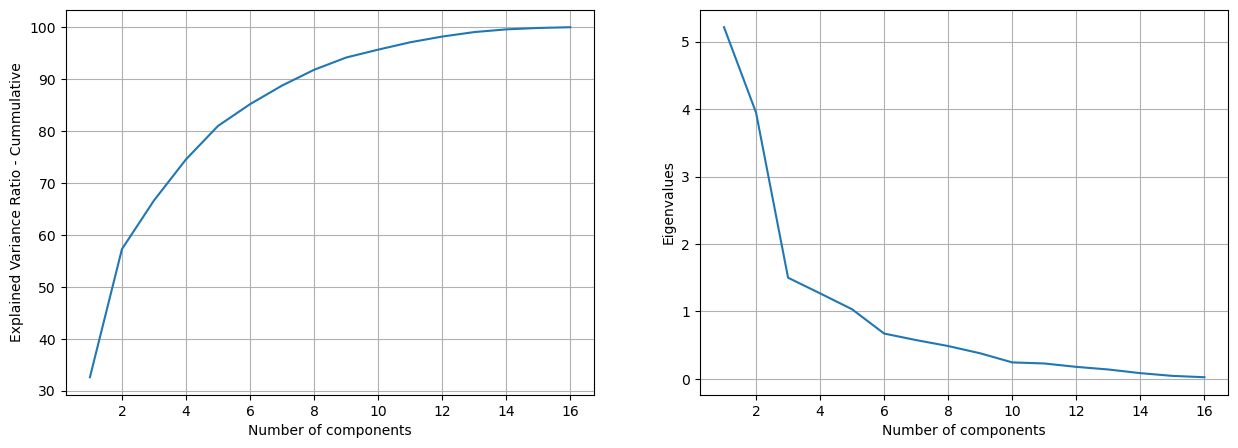

In [25]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

dari grafik ini saya akan menggunakan 85% informasi, karena berdasarkan grafik setelah 85 tidak terlalu signifikan perbedaannya.

In [26]:
# Check the number of features if we want to retain 85 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.85) + 1
num_features

6

In [27]:
# Let's train the model with reducing to 6 component

pca = PCA(n_components=6)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

## Elbow Method

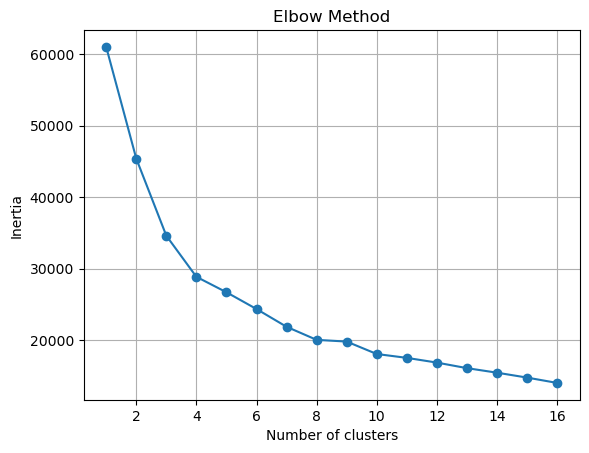

In [28]:
# Menentukan jumlah cluster yang optimal menggunakan metode Elbow
inertia = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled_pca)
    inertia.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1, 17), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Berdasarkan Elbow Method banyak cluster yang saya gunakan adalah 3, karena jika dilihat dari grafik setelah 3 tidak menunjukkan perubahan yang signifikan lagi cenderung sama.

## Silhoutte Score

In [29]:
# # Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3132296195301468
For n_clusters = 3 The average silhouette_score is : 0.2883702357209654
For n_clusters = 4 The average silhouette_score is : 0.2608494175569192
For n_clusters = 5 The average silhouette_score is : 0.2541608173369443
For n_clusters = 6 The average silhouette_score is : 0.2593665153446256
For n_clusters = 7 The average silhouette_score is : 0.26173950795439044


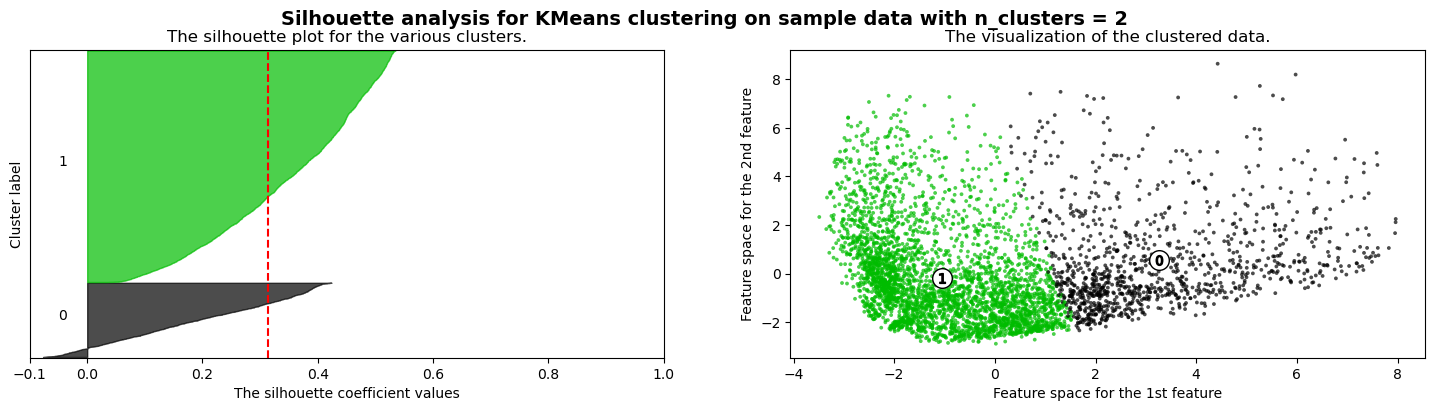

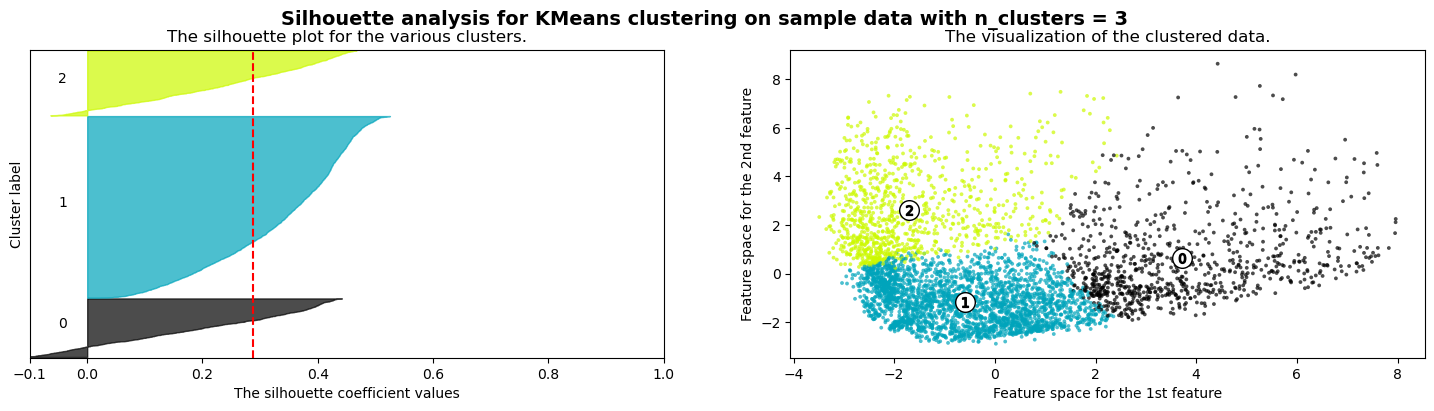

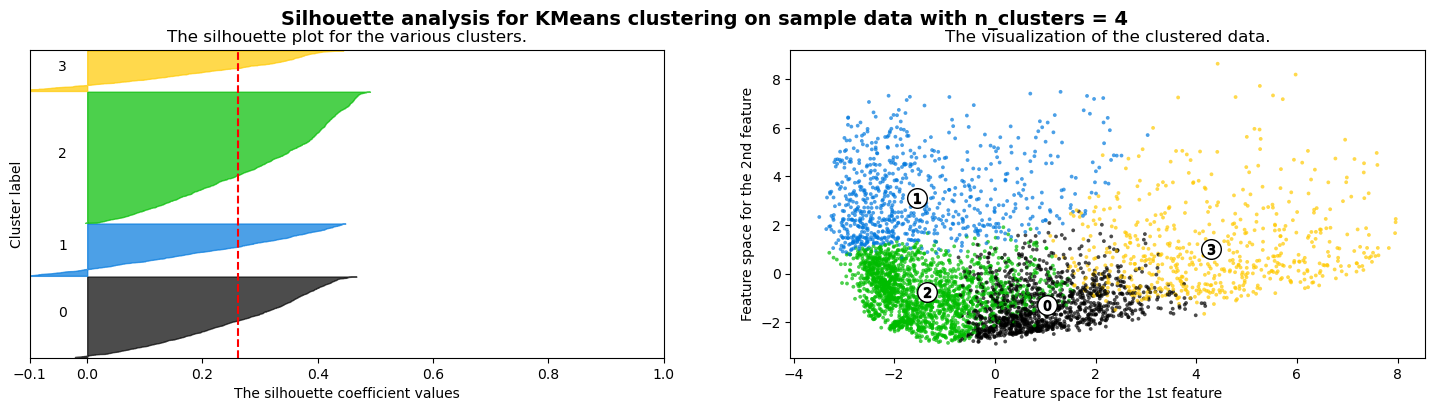

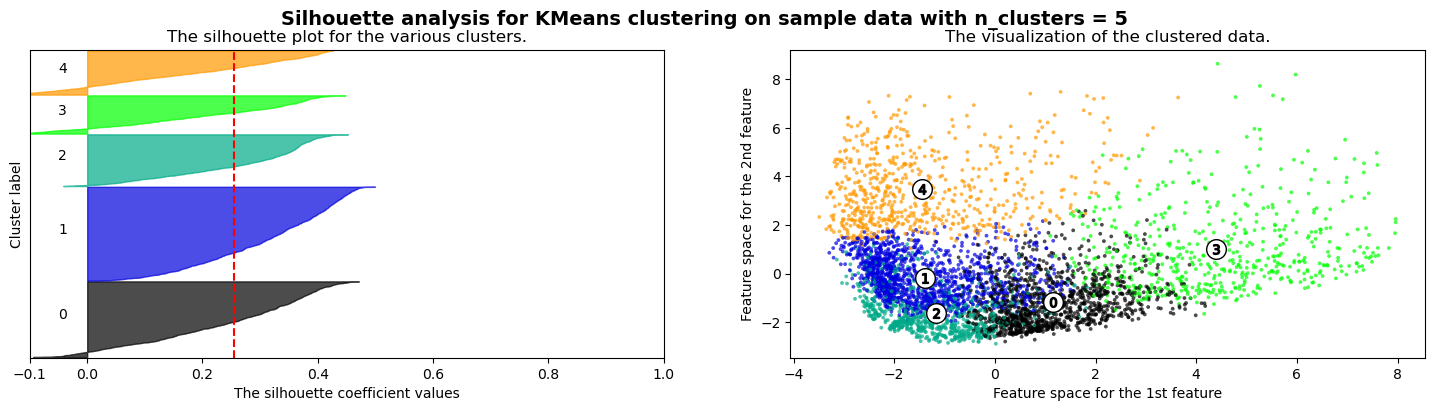

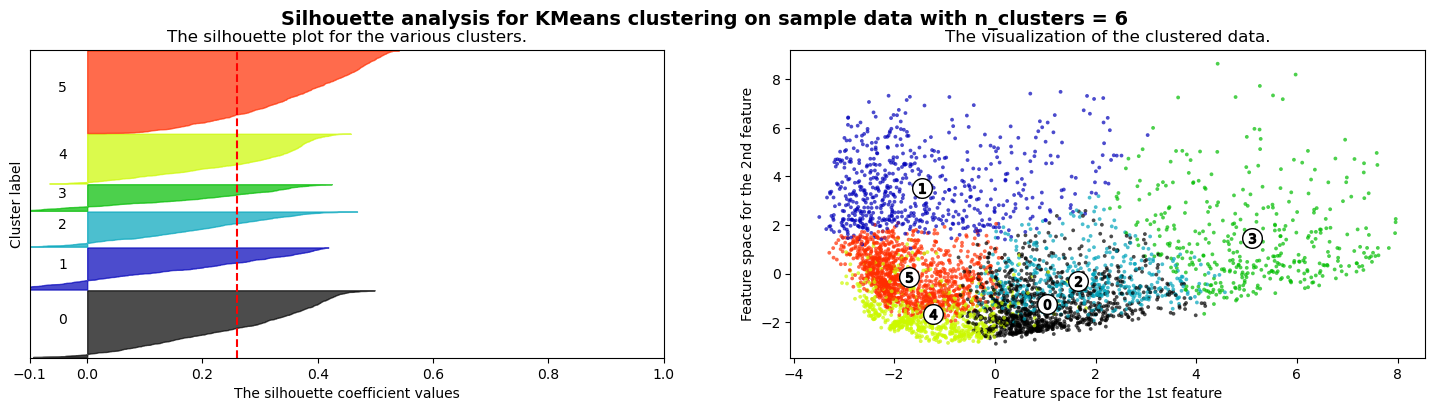

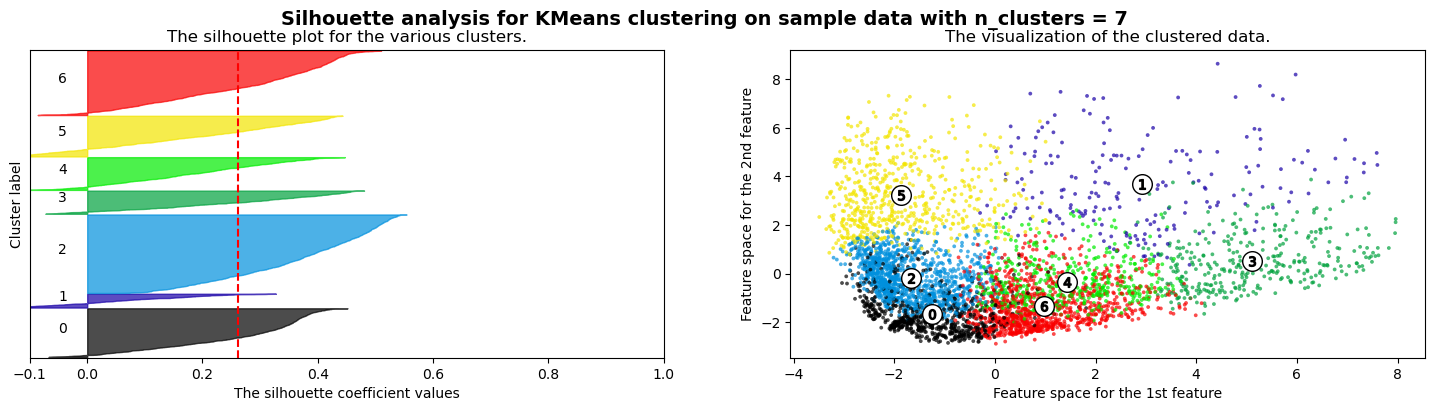

In [30]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, 8),df_scaled_pca, 3)

berdasarkan silhoutte scorenya saya memilih n_clusters = 3, karena hasil silhoutte score n_clusters yang lainnya cenderung memiliki kemiripan.

# Model Definition

Saya memilih algoritma K-Means Clustering untuk melakukan customer segmentation pada data kartu kredit ini. Alasan pemilihan K-Means adalah karena algoritma clustering yang sederhana dan efisien untuk digunakan dalam segmentasi pelanggan.

Pemilihan Hyperparameter:

- n_clusters: Saya menentukan jumlah cluster yang optimal dengan menggunakan Elbow Method dan Silhouette Score. Kedua teknik ini membantu dalam memilih jumlah cluster yang memberikan hasil terbaik dengan meminimalkan inertia (dalam kasus Elbow Method) dan memastikan cluster terpisah dengan baik (melalui Silhouette Score).
- init: Saya menggunakan parameter ‘k-means++’ untuk inisialisasi centroids, yang membantu dalam konvergensi yang lebih cepat dan mencegah inisialisasi yang buruk.
- max_iter: Saya mengatur jumlah iterasi maksimum menjadi 300 untuk memastikan bahwa algoritma memiliki cukup waktu untuk mencapai konvergensi.
random_state: Agar hasil clustering konsisten setiap kali model dijalankan, saya menetapkan nilai random_state.

# Model Training

## Final

In [31]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(df_scaled_pca)

KMeans(n_clusters=3, n_init=10, random_state=3)

In [32]:
pred = km.predict(df_scaled_pca)
pred

array([1, 1, 1, ..., 2, 2, 2])

In [33]:
#iterasi keberapa dia konvergen
km.n_iter_

26

In [34]:
# Insert clustering result into original dataset

df_kmeans = df
df_kmeans['cluster'] = pred
df_kmeans

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,788,16.581535,0.555556,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,309.854995,0.000000,8,1
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
2,2322,1.979916,0.555556,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,309.854995,0.000000,8,1
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,2
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,2
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,16,25,6000.0,905.844846,2376.919568,0.090909,11,2


# Model Evaluation

## EDA After Clustering

<Axes: >

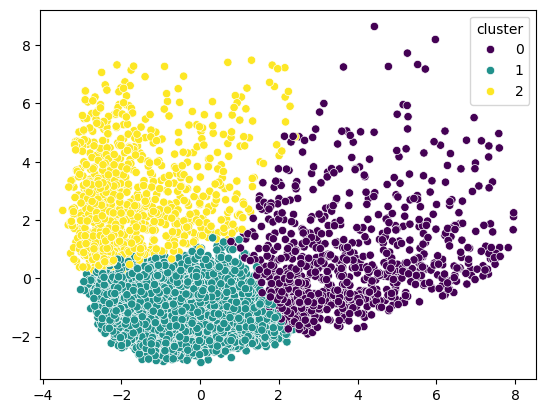

In [35]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=6)
pca_2d.fit(df_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='viridis')

Cluster 0 dan 2 memiliki distribusi yang lebih kompak dibandingkan dengan Cluster 1. Hal ini mungkin menunjukkan bahwa data dalam Cluster 0 dan 2 memiliki kemiripan yang lebih tinggi dibandingkan dengan data dalam Cluster 1.

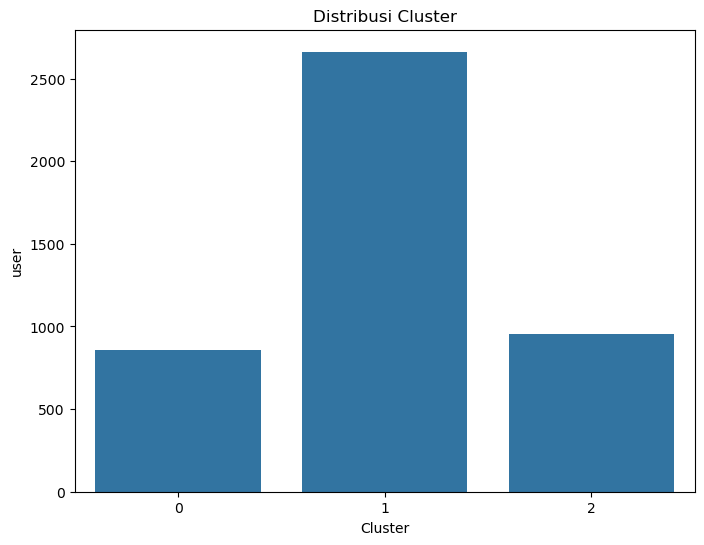

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df_kmeans)
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('user')
plt.show()

Berdasarkan dari distribusinya, cluster 1 yang paling mendominasi

In [37]:
cluster_summary = df_kmeans.groupby('cluster').mean()

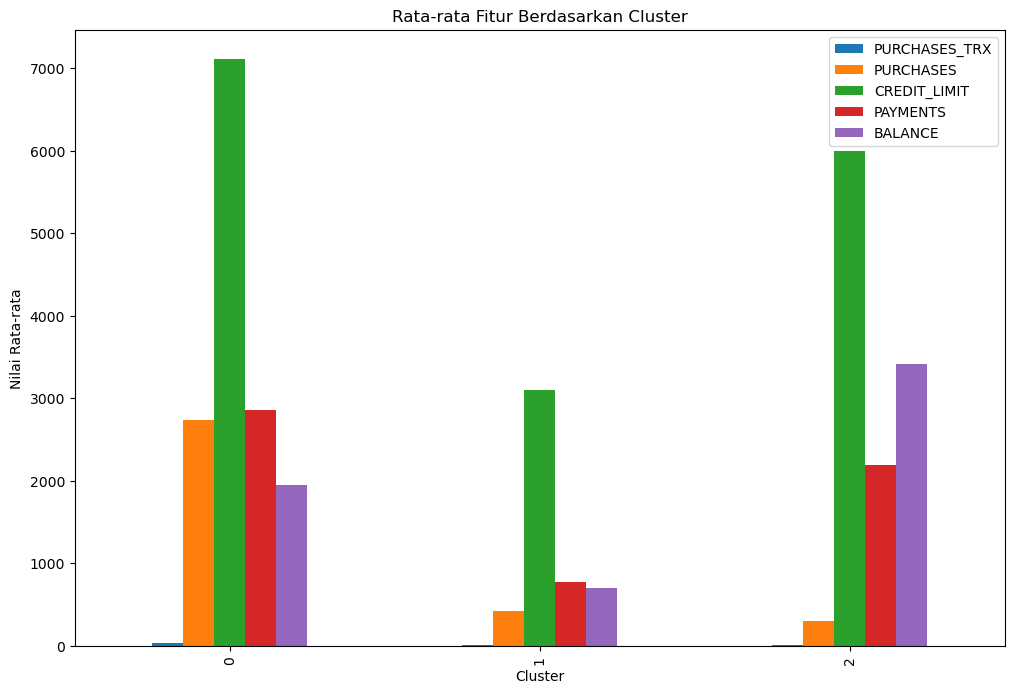

In [38]:
features = ['PURCHASES_TRX', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS','BALANCE']
cluster_summary[features].plot(kind='bar', figsize=(12, 8))
plt.title('Rata-rata Fitur Berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.show()

Insight:
- Cluster 0: Merupakan Pelanggan Aktif dengan Limit Kredit Tinggi
- Cluster 1: Pelanggan dengan Pengeluaran Moderat dengan nilai rata-rata yang lebih rendah dari cluster lainnnya
- Cluster 2: Pelanggan dengan Saldo Tertinggi

# Model Saving

In [39]:
#Save Files

with open('list_num_col.txt', 'w') as file_1:
  json.dump(num_col, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# Model Inference

In [46]:
# Load Files
with open('list_num_col.txt', 'r') as file_1:
    num_col = json.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
    scaler = pickle.load(file_2)

with open('pca.pkl', 'rb') as file_3:
    pca = pickle.load(file_3)

with open('kmeans.pkl', 'rb') as file_4:
    kmeans = pickle.load(file_4)

In [47]:
# Sample data untuk inference
new_data = pd.DataFrame({
    'BALANCE': [1000],
    'PURCHASES': [2000],
    'ONEOFF_PURCHASES': [1000],
    'INSTALLMENTS_PURCHASES': [1000],
    'CASH_ADVANCE': [100],
    'CASH_ADVANCE_FREQUENCY': [0.1],
    'CASH_ADVANCE_TRX': [1],
    'PURCHASES_TRX': [10],
    'CREDIT_LIMIT': [5000],
    'PAYMENTS': [1500],
    'MINIMUM_PAYMENTS': [500],
    'PRC_FULL_PAYMENT': [0.5],
    'BALANCE_FREQUENCY': [1],
    'PURCHASES_FREQUENCY': [0.8],
    'ONEOFF_PURCHASES_FREQUENCY': [0.5],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [0.5]
})

# Preprocessing
new_data_scaled = scaler.transform(new_data[num_col])
new_data_pca = pca.transform(new_data_scaled)

# Predict Cluster
cluster = kmeans.predict(new_data_pca)

print("Predicted Cluster:", cluster[0])

Predicted Cluster: 0


Berdasarkan hasil inferensi model, data baru yang diinputkan diprediksi termasuk ke dalam cluster 0. 

Cluster 0: Merupakan Pelanggan Aktif dengan Limit Kredit Tinggi
- Data baru yang diinputkan menunjukkan karakteristik sebagai Pelanggan Aktif dengan Limit Kredit Tinggi
- Ini mengindikasikan bahwa pelanggan ini memiliki kemampuan berbelanja yang tinggi serta melakukan transaksi pembelian dengan frekuensi yang cukup tinggi.
- Dengan demikian, strategi marketing yang dapat diterapkan pada cluster ini adalah memberikan penawaran khusus seperti diskon atau promo eksklusif yang dapat menarik minat pelanggan dan meningkatkan engagement.


# Pengambilan Kesimpulan

Kesimpulan:
- Cluster 0
>Karakteristik cluster ini memiliki jumlah transaksi pembelian dan total pembelian yang cukup tinggi, serta limit kredit yang jauh di atas rata-rata.
User dalam cluster ini cenderung sangat aktif dalam melakukan transaksi dan memiliki kepercayaan kredit yang tinggi dari bank. Mereka mungkin merupakan pelanggan setia atau pengguna kartu kredit utama.

- Cluster 1
>Karakteristik cluster ini memiliki nilai rata-rata yang lebih rendah untuk semua fitur dibandingkan dengan cluster 0.
User dalam cluster ini cenderung memiliki pengeluaran yang lebih moderat dan user mungkin memiliki anggaran yang terbatas, atau baru saja mulai menggunakan kartu kredit.

- Cluster 2
>Karakteristik cluster ini memiliki saldo rata-rata yang jauh lebih tinggi dibandingkan dengan dua cluster lainnya.
User dalam cluster ini mungkin memiliki kesulitan dalam melunasi tagihan atau cenderung menunda pembayaran.


Rekomendasi:


penawaran produk dan layanan dengan karakteristik masing-masing cluster. Misalnya:

- Cluster 0: Tawarkan promo atau diskon khusus, serta kembangkan produk atau layanan yang sesuai dengan anggaran mereka.

- Cluster 1: Fokus pada upaya penagihan dan pengelolaan risiko kredit. Tawarkan program cicilan atau restrukturisasi utang untuk membantu pelanggan melunasi tagihan.

- Cluster 2: Fokus pada upaya penagihan dan pengelolaan risiko kredit. Tawarkan program cicilan atau restrukturisasi utang untuk membantu pelanggan melunasi tagihan.